# Exploratory Data Analysis (EDA) of the Load Prediction dataset. 

This dataset is used in the in the chalenge Analytics Vidhya - Loan Prediction.

The description of the chalenge is avaliable in: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

To begin, I'll import all of the libraries and packages required to do an EDA in Python.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading the dataset.

In [2]:
loan_df = pd.read_csv('train_ctrUa4K.csv')
loan_df.shape

(614, 13)

There are 614 registers and 13 variables in this dataset. But, are all of the lines filled in, or are there some gaps in the dataset?

To test this, I'll look at the number of null values in the dataset.

In [3]:
loan_df.isnull().count()

Loan_ID              614
Gender               614
Married              614
Dependents           614
Education            614
Self_Employed        614
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           614
Loan_Amount_Term     614
Credit_History       614
Property_Area        614
Loan_Status          614
dtype: int64

How the dataset contains a large number of null values I'm going to remove all of these values. Also, look into some general aspects of it.

In [4]:
loan_df = loan_df.dropna()
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


The dataset now has 480 lines filled in, which is a significant amount of data to proceed with the EDA. Approximately 22% of the original data was removed during the process.
The comand describe is shown the main characteristics of the dataset but just to the numerical columns. Applicantincome and Coapplicantincome have the major standardd deviation. Credit_History was considered as a numerical columns but accually it is a categorical variable once the values in the columns are just 1 and 0. At least 50% of the Loan_Amount_Term are equal to 360.00 beacus the quartiles 25%, 50%, and 70% are equal, so apparently this variables doesn't have much variation. 

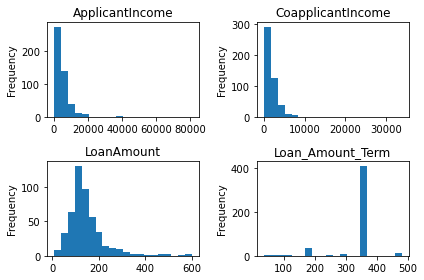

In [5]:
fig, ax = plt.subplots(2, 2)
row, col = 0, 0
columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for column in columns:
    loan_df[column].plot(kind='hist', bins=20, ax=ax[row, col])
    ax[row,col].set_title(column)
    col += 1
    if col == 2:
        row += 1
        col = 0
fig.tight_layout()
plt.show()

The four variables have concentrated distributions, which is not a normal distribution, according to the histogram. Applicantincome and Coapplicantincome have very similar distributions, and the majority of the values in these two variables are concentrated near zero. LoanAmount has a distribution that is somewhat similar to a normal distribution, but it is still unbalanced. Loan Amount Term has a sparse distribution, with the majority of values centered on 360.

A boxplot, as shown below, is another chart that can be used.

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

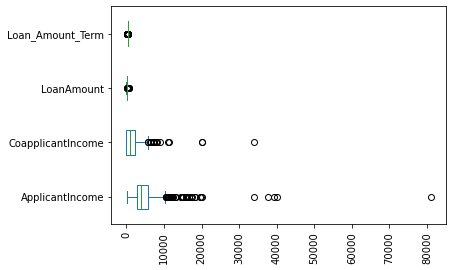

In [6]:
loan_df[columns].plot(kind='box', vert=False)
plt.xticks(rotation=90)

The boxplots confirm what the histograms revealed. Each of these variables has a narrow distribution. Loan_Amount_Term and LoanAmount are variables with almost imperceptible variations in values. There are a lot of outliers in ApplicanteIncome.

Let's look at the correlation between the variables.

In [7]:
loan_df[columns].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775
LoanAmount,0.495310,0.190740,1.000000,0.050867
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000


The most correlated variables, according to the previous results, are ApplicantIncome and LoanAmount. The correlation between the other variables is very weak and insignificant. In light of this, I'll create a scatter plot comparing the most correlated variables.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

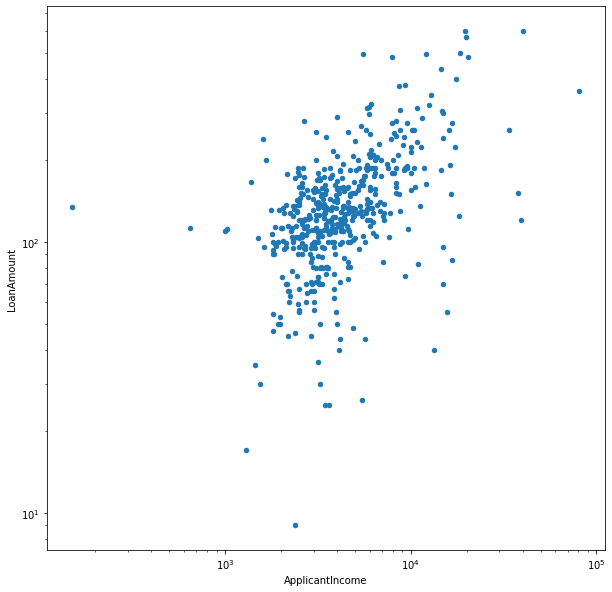

In [8]:
loan_df[['ApplicantIncome', 'LoanAmount']].plot(kind='scatter', x='ApplicantIncome', y='LoanAmount', figsize=(10,10), logx=True, logy=True)

Plotting the data on a normal scale revealed no discernible relationship between these two variables, so I decided to use a logarithmic scale on both axes. It is possible to see that the LoanAmount tends to increase as the ApplicantIncome rises. However, this tendency is frail.

Now I'll explore the categorical variables.

In [9]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


C:\Users\duart\miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\duart\miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


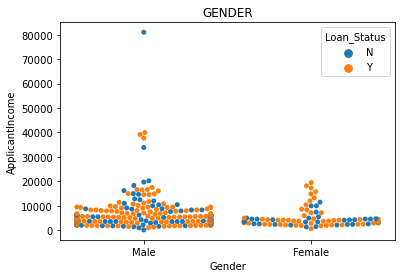

C:\Users\duart\miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\duart\miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


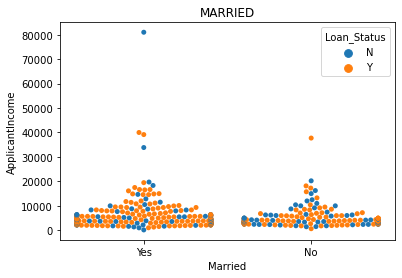

C:\Users\duart\miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\duart\miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\duart\miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\duart\miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


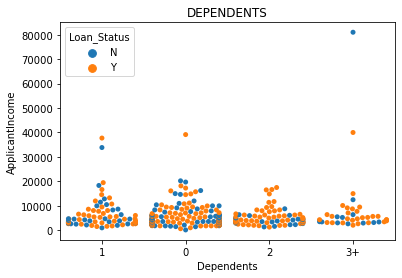

C:\Users\duart\miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\duart\miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


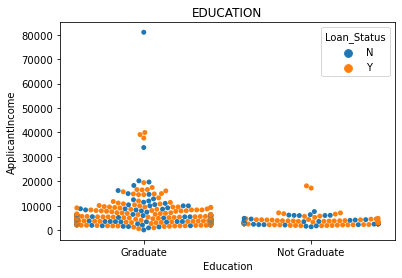

C:\Users\duart\miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


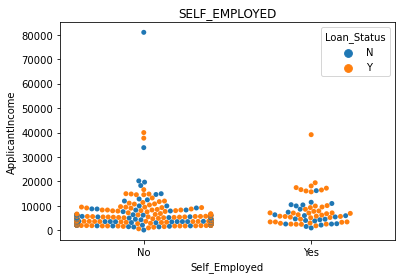

C:\Users\duart\miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\duart\miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


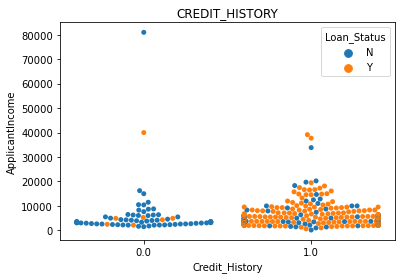

C:\Users\duart\miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\duart\miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\duart\miniconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


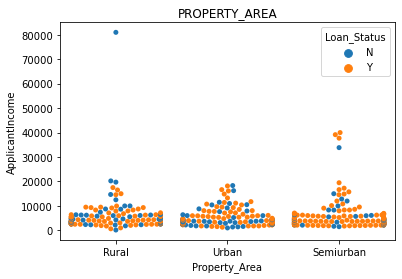

In [11]:
for variable in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']:
    plt.figure()
    sns.swarmplot(x=variable, y='ApplicantIncome', hue='Loan_Status', data=loan_df)
    plt.title(variable.upper())
    plt.show()

TMen make up the vast majority of this dataset's sample, and they generally have the highest AplicantIncome. The majority of the samples are married, and the amount of AplicantIncome earned by marrieds and unmarrieds is comparable. The number of dependents is similar across the samples, but those who do not have dependents tend to request more Loan, while those who do have dependents tend to have more ApplicantIncome. Graduates tend to request more loans and have a higher ApplyntAmount than those who have not graduated. Self-employed people tend to try less loans than those who aren't. The majority of the samples have a good credit history. People who live in a semi-urban area tend to have a slightly higher ApplicantAmount than others.